# 🤖 ML Training Pipeline - Random Forest Models

This notebook demonstrates the complete machine learning training pipeline for the Blockchain Certificate Verification System.

## 📊 Datasets Covered:
1. **Coursera Course Dataset** - Regression on course ratings
2. **Text Document Classification** - Document type classification  
3. **OCR Character Recognition** - Image-based character classification
4. **Synthetic Fraud Detection** - Binary classification for fraud detection

## 🎯 Models Used:
- **Random Forest Classifier** - For classification tasks
- **Random Forest Regressor** - For rating prediction

---

## 📦 Step 1: Import Required Libraries

In [1]:
import os
import json
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import warnings

# Machine Learning
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    mean_squared_error, r2_score, mean_absolute_error
)

# Plotting settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

✅ All libraries imported successfully!
NumPy version: 1.26.4
Pandas version: 2.2.2


## 📂 Step 2: Dataset 1 - Coursera Course Ratings

Load and explore the Coursera course dataset for regression analysis.

In [2]:
# Load Coursera dataset
coursera_path = "../Datasets/Coursera Course Dataset/coursea_data.csv"

if os.path.exists(coursera_path):
    df_coursera = pd.read_csv(coursera_path)
    print(f"✅ Dataset loaded successfully!")
    print(f"Shape: {df_coursera.shape}")
    print(f"\nColumns: {df_coursera.columns.tolist()}")
    print(f"\nFirst 5 rows:")
    display(df_coursera.head())
    
    print("\n📊 Dataset Info:")
    print(df_coursera.info())
    
    print("\n📈 Statistical Summary:")
    display(df_coursera.describe())
else:
    print(f"❌ File not found: {coursera_path}")

✅ Dataset loaded successfully!
Shape: (891, 7)

Columns: ['Unnamed: 0', 'course_title', 'course_organization', 'course_Certificate_type', 'course_rating', 'course_difficulty', 'course_students_enrolled']

First 5 rows:


,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k



📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB
None

📈 Statistical Summary:


,Unnamed: 0,course_rating
count,891.000000,891.000000
mean,445.000000,4.677329
std,257.353842,0.162225
min,0.000000,3.300000
25%,222.500000,4.600000
50%,445.000000,4.700000
75%,667.500000,4.800000
max,890.000000,5.000000


### 📊 Visualize Course Ratings Distribution

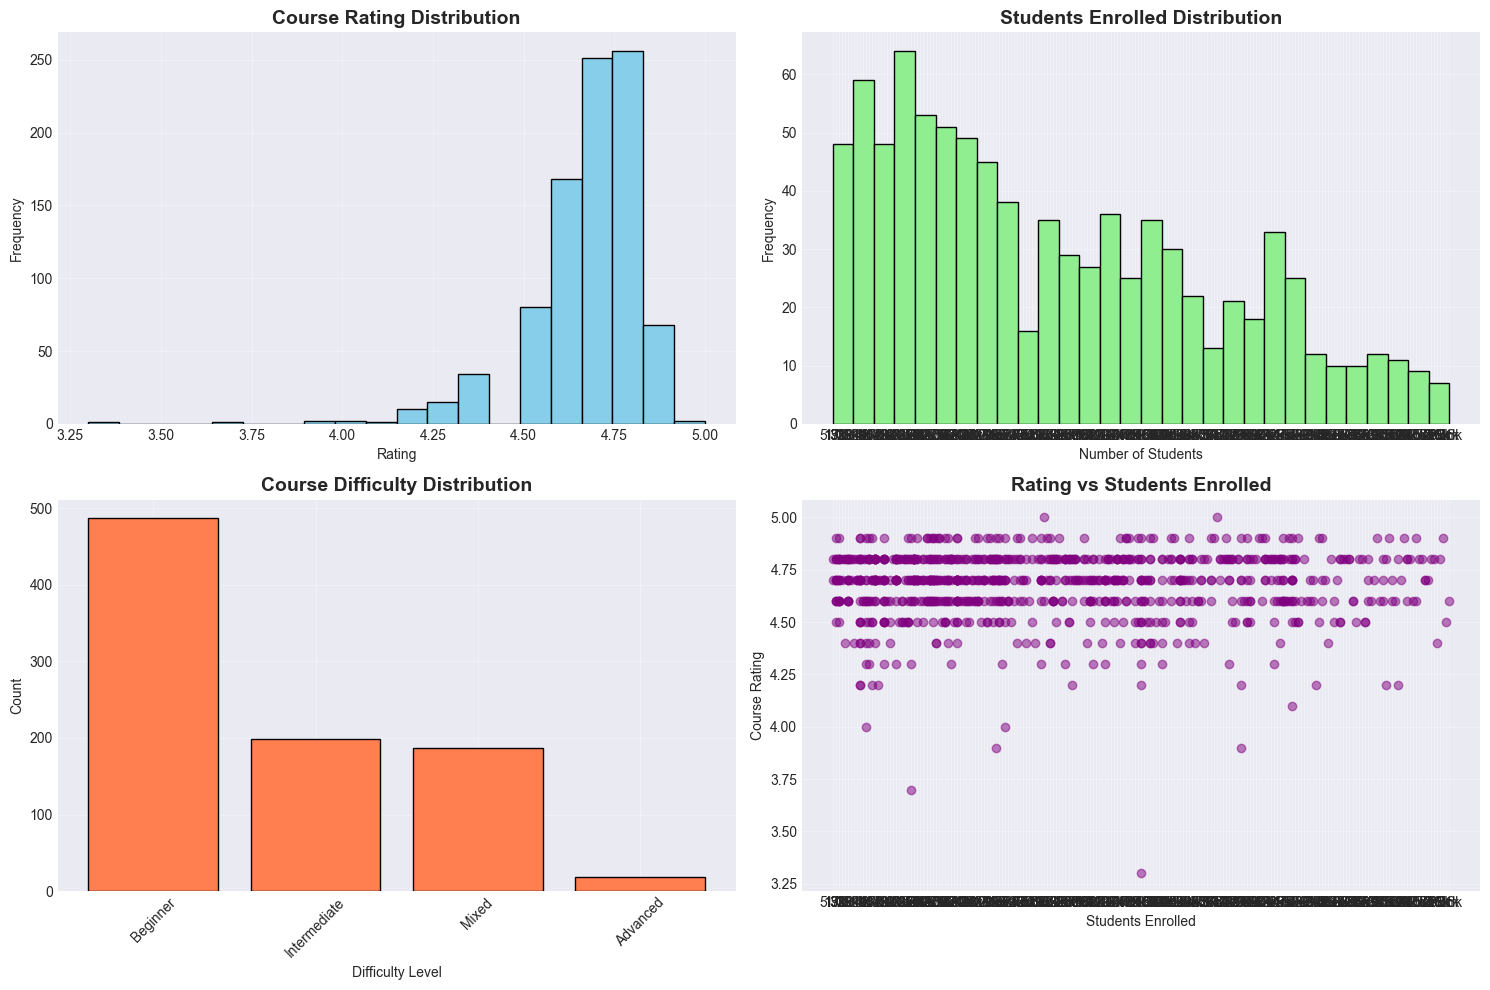


📊 Rating Statistics:
  Mean Rating: 4.68
  Median Rating: 4.70
  Std Dev: 0.16


In [3]:
if 'df_coursera' in locals():
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Rating distribution
    axes[0, 0].hist(df_coursera['course_rating'], bins=20, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Course Rating Distribution', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Rating')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(alpha=0.3)
    
    # Students enrolled distribution
    axes[0, 1].hist(df_coursera['course_students_enrolled'], bins=30, color='lightgreen', edgecolor='black')
    axes[0, 1].set_title('Students Enrolled Distribution', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Number of Students')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].grid(alpha=0.3)
    
    # Difficulty distribution
    difficulty_counts = df_coursera['course_difficulty'].value_counts()
    axes[1, 0].bar(difficulty_counts.index, difficulty_counts.values, color='coral', edgecolor='black')
    axes[1, 0].set_title('Course Difficulty Distribution', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Difficulty Level')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(alpha=0.3)
    
    # Rating vs Students (scatter)
    axes[1, 1].scatter(df_coursera['course_students_enrolled'], 
                       df_coursera['course_rating'], 
                       alpha=0.5, color='purple')
    axes[1, 1].set_title('Rating vs Students Enrolled', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Students Enrolled')
    axes[1, 1].set_ylabel('Course Rating')
    axes[1, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Rating Statistics:")
    print(f"  Mean Rating: {df_coursera['course_rating'].mean():.2f}")
    print(f"  Median Rating: {df_coursera['course_rating'].median():.2f}")
    print(f"  Std Dev: {df_coursera['course_rating'].std():.2f}")

### 🤖 Train Random Forest Regressor on Coursera Data

In [4]:
if 'df_coursera' in locals():
    # Prepare features and target
    X = df_coursera.drop('course_rating', axis=1).select_dtypes(include=[np.number])
    y = df_coursera['course_rating']
    
    print(f"Features: {X.columns.tolist()}")
    print(f"Target: course_rating")
    print(f"Dataset shape: X={X.shape}, y={y.shape}")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model
    print("\n🔄 Training Random Forest Regressor...")
    rf_regressor = RandomForestRegressor(
        n_estimators=100,
        max_depth=15,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    )
    rf_regressor.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = rf_regressor.predict(X_test_scaled)
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n✅ Model Training Complete!")
    print(f"\n📊 Performance Metrics:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_regressor.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\n🎯 Feature Importance:")
    display(feature_importance)

Features: ['Unnamed: 0']
Target: course_rating
Dataset shape: X=(891, 1), y=(891,)

🔄 Training Random Forest Regressor...



✅ Model Training Complete!

📊 Performance Metrics:
  RMSE: 0.1523
  MAE:  0.1185
  R² Score: -0.4609

🎯 Feature Importance:


,feature,importance
0,Unnamed: 0,1.0


### 📈 Visualize Regression Results

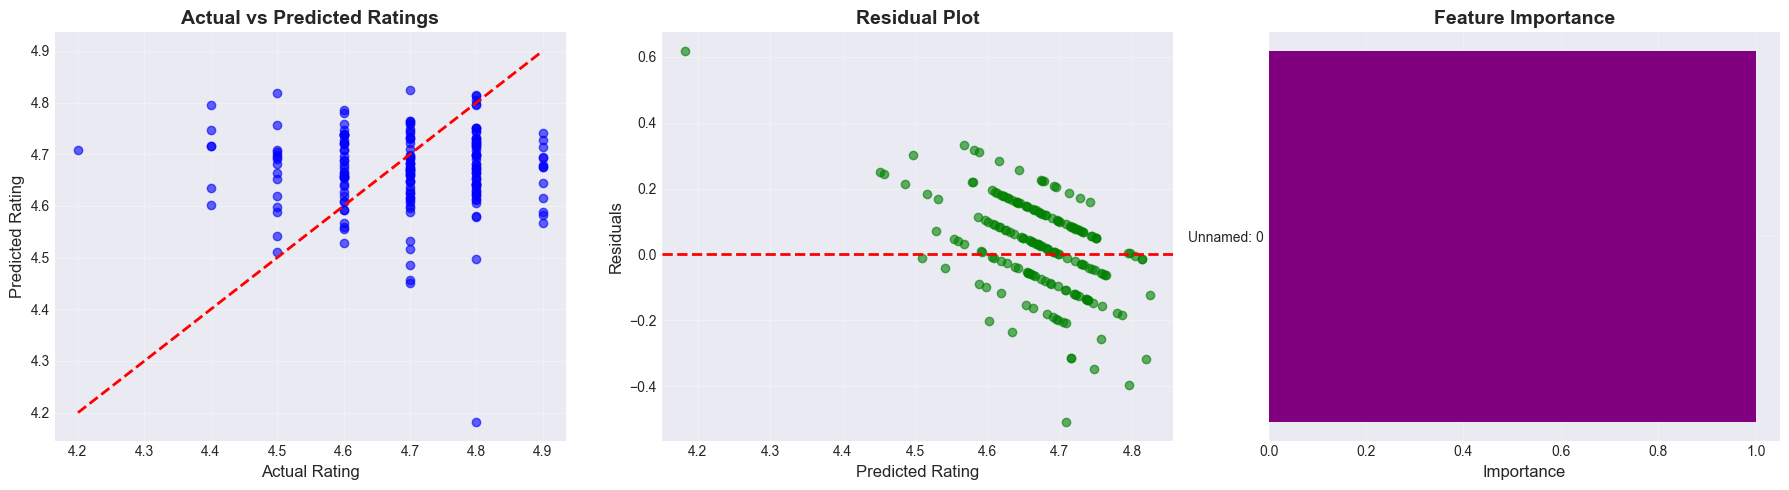

In [5]:
if 'y_pred' in locals():
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Actual vs Predicted
    axes[0].scatter(y_test, y_pred, alpha=0.6, color='blue')
    axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0].set_xlabel('Actual Rating', fontsize=12)
    axes[0].set_ylabel('Predicted Rating', fontsize=12)
    axes[0].set_title('Actual vs Predicted Ratings', fontsize=14, fontweight='bold')
    axes[0].grid(alpha=0.3)
    
    # Residuals
    residuals = y_test - y_pred
    axes[1].scatter(y_pred, residuals, alpha=0.6, color='green')
    axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
    axes[1].set_xlabel('Predicted Rating', fontsize=12)
    axes[1].set_ylabel('Residuals', fontsize=12)
    axes[1].set_title('Residual Plot', fontsize=14, fontweight='bold')
    axes[1].grid(alpha=0.3)
    
    # Feature Importance
    axes[2].barh(feature_importance['feature'], feature_importance['importance'], color='purple')
    axes[2].set_xlabel('Importance', fontsize=12)
    axes[2].set_title('Feature Importance', fontsize=14, fontweight='bold')
    axes[2].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

---
## 📄 Step 3: Dataset 2 - Text Document Classification

Load and classify text documents based on their features.

In [6]:
# Load Text Classification dataset
text_path = "../Datasets/Text Document Classification Dataset/df_file.csv"

if os.path.exists(text_path):
    df_text = pd.read_csv(text_path)
    print(f"✅ Dataset loaded successfully!")
    print(f"Shape: {df_text.shape}")
    print(f"\nColumns: {df_text.columns.tolist()}")
    print(f"\nFirst 5 rows:")
    display(df_text.head(10))
    
    print("\n📊 Dataset Info:")
    print(df_text.info())
    
    # Check class distribution
    if len(df_text.columns) > 1:
        print(f"\n📈 Class Distribution:")
        display(df_text.iloc[:, -1].value_counts())
else:
    print(f"❌ File not found: {text_path}")

✅ Dataset loaded successfully!
Shape: (2225, 2)

Columns: ['Text', 'Label']

First 5 rows:


,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0
5,Donor attacks Blair-Brown 'feud'\n \n The repo...,0
6,Research fears over Kelly's views\n \n Scienti...,0
7,Chancellor rallies Labour voters\n \n Gordon B...,0
8,Fox attacks Blair's Tory 'lies'\n \n Tony Blai...,0
9,Tories unveil quango blitz plans\n \n Plans to...,0



📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB
None

📈 Class Distribution:


Label
1    511
4    510
0    417
2    401
3    386
Name: count, dtype: int64

---
## 🖼️ Step 4: Dataset 3 - OCR Character Recognition

Process OCR images and train a classifier for character recognition.

In [7]:
# Load OCR images
ocr_dir = "../Datasets/standard OCR dataset"
ocr_features = []
ocr_labels = []
sample_images = []

print("🔄 Loading OCR images...")

if os.path.exists(ocr_dir):
    count = 0
    for root, dirs, files in os.walk(ocr_dir):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                try:
                    img = Image.open(img_path).convert('L')
                    img_array = np.array(img).flatten()[:100]
                    if len(img_array) == 100:
                        ocr_features.append(img_array)
                        label = os.path.basename(root)
                        ocr_labels.append(label)
                        
                        # Save first 12 images for visualization
                        if len(sample_images) < 12:
                            sample_images.append((img, label))
                        count += 1
                except:
                    pass
            if count >= 500:  # Limit to 500 images for notebook
                break
        if count >= 500:
            break
    
    print(f"✅ Loaded {len(ocr_features)} images")
    print(f"📊 Unique labels: {len(set(ocr_labels))}")
    print(f"🔤 Labels: {sorted(set(ocr_labels))[:20]}...")  # Show first 20 labels
else:
    print(f"❌ Directory not found: {ocr_dir}")

🔄 Loading OCR images...


✅ Loaded 500 images
📊 Unique labels: 18
🔤 Labels: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']...


### 🖼️ Visualize Sample OCR Images

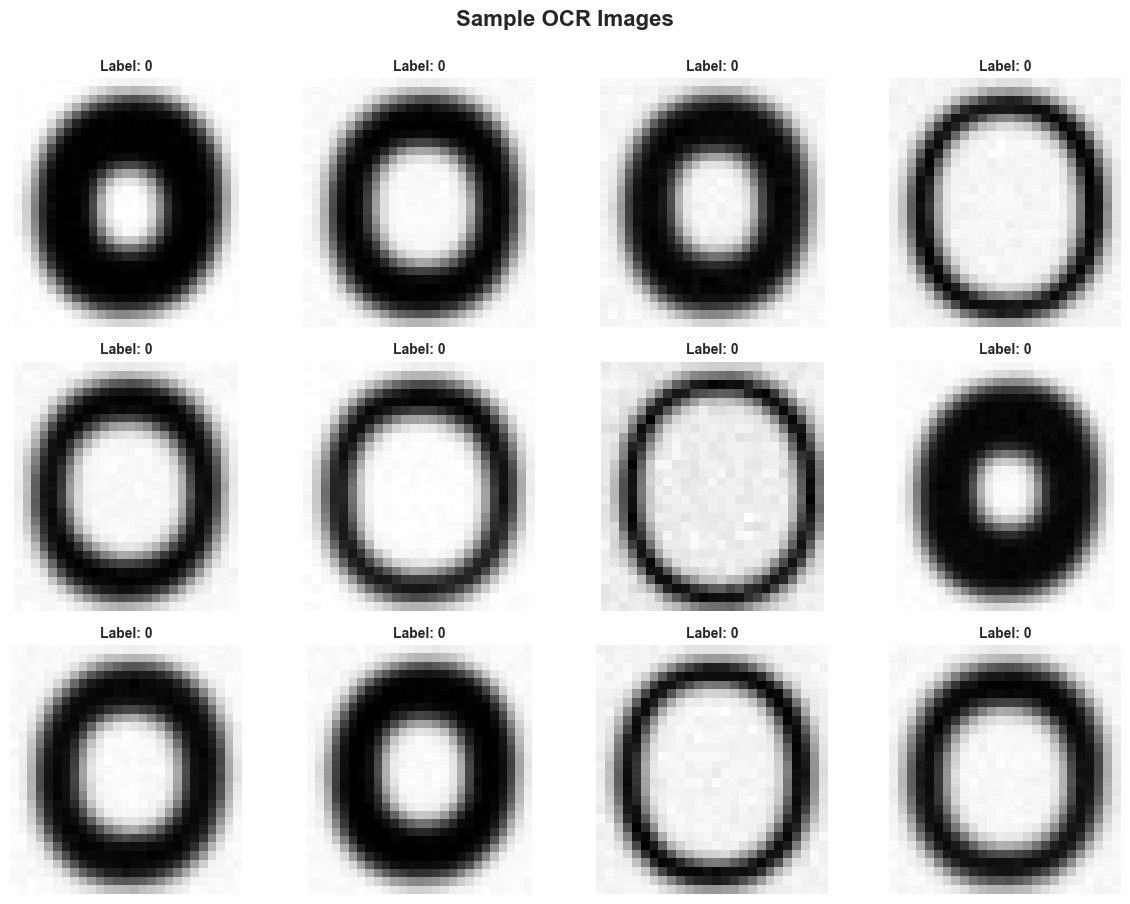

In [8]:
if len(sample_images) > 0:
    fig, axes = plt.subplots(3, 4, figsize=(12, 9))
    axes = axes.flatten()
    
    for idx, (img, label) in enumerate(sample_images[:12]):
        axes[idx].imshow(img, cmap='gray')
        axes[idx].set_title(f'Label: {label}', fontsize=10, fontweight='bold')
        axes[idx].axis('off')
    
    plt.suptitle('Sample OCR Images', fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()

### 🤖 Train Random Forest Classifier on OCR Data

In [9]:
if len(ocr_features) > 10:
    # Prepare data
    X_ocr = pd.DataFrame(ocr_features)
    y_ocr = pd.Series(ocr_labels)
    
    print(f"Dataset shape: X={X_ocr.shape}, y={y_ocr.shape}")
    print(f"Number of classes: {y_ocr.nunique()}")
    
    # Encode labels
    le = LabelEncoder()
    y_ocr_encoded = le.fit_transform(y_ocr)
    
    # Check class distribution
    unique_classes = np.unique(y_ocr_encoded)
    min_class_size = min(np.bincount(y_ocr_encoded))
    stratify = y_ocr_encoded if min_class_size >= 2 else None
    
    # Split data
    X_train_ocr, X_test_ocr, y_train_ocr, y_test_ocr = train_test_split(
        X_ocr, y_ocr_encoded, test_size=0.2, random_state=42, stratify=stratify
    )
    
    # Scale features
    scaler_ocr = StandardScaler()
    X_train_ocr_scaled = scaler_ocr.fit_transform(X_train_ocr)
    X_test_ocr_scaled = scaler_ocr.transform(X_test_ocr)
    
    # Train model
    print("\n🔄 Training Random Forest Classifier...")
    rf_ocr = RandomForestClassifier(
        n_estimators=100,
        max_depth=15,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    )
    rf_ocr.fit(X_train_ocr_scaled, y_train_ocr)
    
    # Predictions
    y_pred_ocr = rf_ocr.predict(X_test_ocr_scaled)
    
    # Metrics
    accuracy_ocr = accuracy_score(y_test_ocr, y_pred_ocr)
    
    print(f"\n✅ Model Training Complete!")
    print(f"\n📊 Performance Metrics:")
    print(f"  Accuracy: {accuracy_ocr:.4f}")
    print(f"  Number of samples: {len(X_ocr)}")
    print(f"  Training samples: {len(X_train_ocr)}")
    print(f"  Test samples: {len(X_test_ocr)}")

Dataset shape: X=(500, 100), y=(500,)
Number of classes: 18

🔄 Training Random Forest Classifier...



✅ Model Training Complete!

📊 Performance Metrics:
  Accuracy: 0.3200
  Number of samples: 500
  Training samples: 400
  Test samples: 100


### 📊 Visualize OCR Classification Results

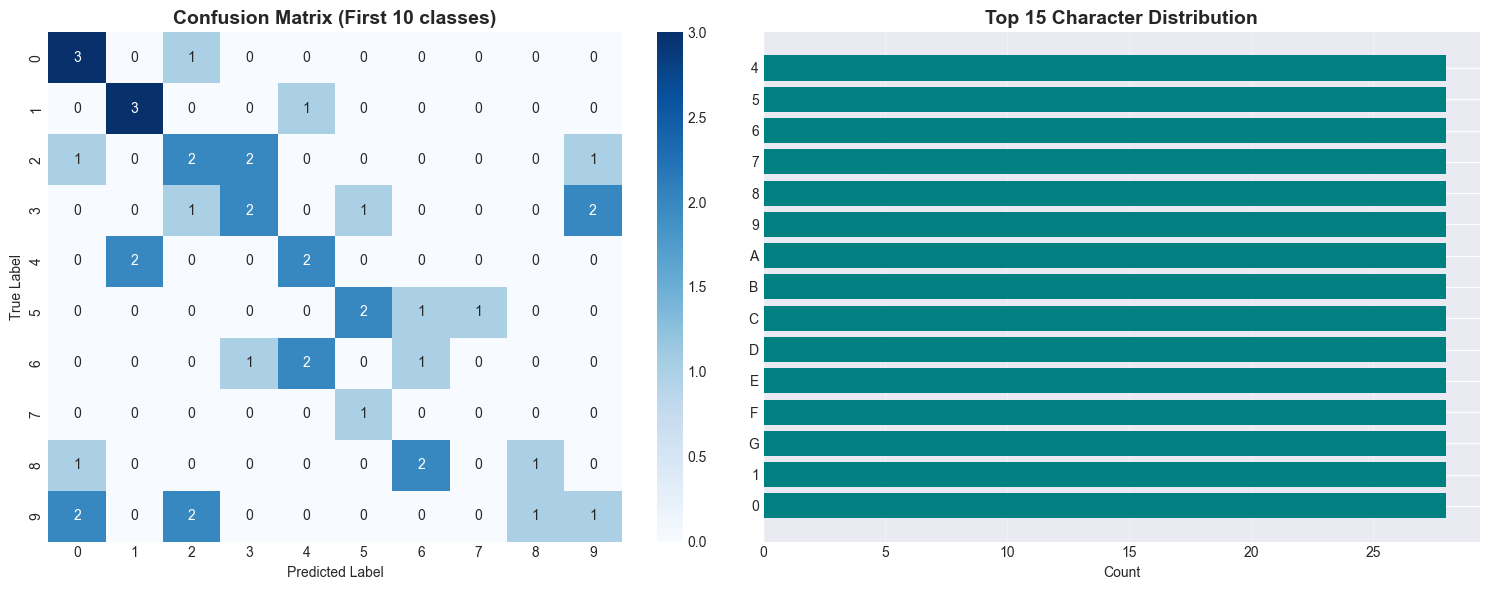

In [10]:
if 'y_pred_ocr' in locals():
    # Confusion Matrix
    cm_ocr = confusion_matrix(y_test_ocr, y_pred_ocr)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Confusion Matrix (show subset for readability)
    if cm_ocr.shape[0] <= 10:
        sns.heatmap(cm_ocr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
        axes[0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Predicted Label')
        axes[0].set_ylabel('True Label')
    else:
        # Show subset of confusion matrix for many classes
        subset_size = min(10, cm_ocr.shape[0])
        cm_subset = cm_ocr[:subset_size, :subset_size]
        sns.heatmap(cm_subset, annot=True, fmt='d', cmap='Blues', ax=axes[0])
        axes[0].set_title(f'Confusion Matrix (First {subset_size} classes)', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Predicted Label')
        axes[0].set_ylabel('True Label')
    
    # Class distribution
    class_counts = pd.Series(y_ocr_encoded).value_counts().head(15)
    axes[1].barh(range(len(class_counts)), class_counts.values, color='teal')
    axes[1].set_yticks(range(len(class_counts)))
    axes[1].set_yticklabels([le.inverse_transform([i])[0] for i in class_counts.index])
    axes[1].set_xlabel('Count')
    axes[1].set_title('Top 15 Character Distribution', fontsize=14, fontweight='bold')
    axes[1].grid(alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()

---
## 🔍 Step 5: Dataset 4 - Synthetic Fraud Detection

Generate synthetic fraud data and train a classifier.

In [11]:
# Generate synthetic fraud detection data
np.random.seed(42)
n_samples = 1000

# Create features
X_fraud = np.random.randn(n_samples, 10)

# Create target with patterns
y_fraud = ((X_fraud[:, 0] > 0.5) & (X_fraud[:, 1] < -0.5) | (np.abs(X_fraud[:, 2]) > 2)).astype(int)

X_fraud_df = pd.DataFrame(X_fraud, columns=[f'feature_{i}' for i in range(10)])

print(f"✅ Generated synthetic fraud dataset")
print(f"Shape: {X_fraud_df.shape}")
print(f"Fraud cases: {y_fraud.sum()} ({y_fraud.sum()/len(y_fraud)*100:.1f}%)")
print(f"Normal cases: {(1-y_fraud).sum()} ({(1-y_fraud).sum()/len(y_fraud)*100:.1f}%)")

print(f"\n📊 First 5 rows:")
display(X_fraud_df.head())

✅ Generated synthetic fraud dataset
Shape: (1000, 10)
Fraud cases: 129 (12.9%)
Normal cases: 871 (87.1%)

📊 First 5 rows:


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040


### 🤖 Train Random Forest Classifier for Fraud Detection

In [12]:
# Split data
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(
    X_fraud_df, y_fraud, test_size=0.2, random_state=42, stratify=y_fraud
)

# Scale features
scaler_fraud = StandardScaler()
X_train_fraud_scaled = scaler_fraud.fit_transform(X_train_fraud)
X_test_fraud_scaled = scaler_fraud.transform(X_test_fraud)

# Train model
print("🔄 Training Random Forest Classifier...")
rf_fraud = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)
rf_fraud.fit(X_train_fraud_scaled, y_train_fraud)

# Predictions
y_pred_fraud = rf_fraud.predict(X_test_fraud_scaled)
y_pred_fraud_proba = rf_fraud.predict_proba(X_test_fraud_scaled)[:, 1]

# Metrics
accuracy_fraud = accuracy_score(y_test_fraud, y_pred_fraud)
precision_fraud = precision_score(y_test_fraud, y_pred_fraud)
recall_fraud = recall_score(y_test_fraud, y_pred_fraud)
f1_fraud = f1_score(y_test_fraud, y_pred_fraud)

print(f"\n✅ Model Training Complete!")
print(f"\n📊 Performance Metrics:")
print(f"  Accuracy:  {accuracy_fraud:.4f}")
print(f"  Precision: {precision_fraud:.4f}")
print(f"  Recall:    {recall_fraud:.4f}")
print(f"  F1 Score:  {f1_fraud:.4f}")

# Feature importance
feature_importance_fraud = pd.DataFrame({
    'feature': X_fraud_df.columns,
    'importance': rf_fraud.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n🎯 Top 5 Features:")
display(feature_importance_fraud.head())

🔄 Training Random Forest Classifier...



✅ Model Training Complete!

📊 Performance Metrics:
  Accuracy:  0.9900
  Precision: 1.0000
  Recall:    0.9231
  F1 Score:  0.9600

🎯 Top 5 Features:


,feature,importance
1,feature_1,0.288594
0,feature_0,0.287685
2,feature_2,0.263765
5,feature_5,0.027583
7,feature_7,0.026730


### 📊 Visualize Fraud Detection Results

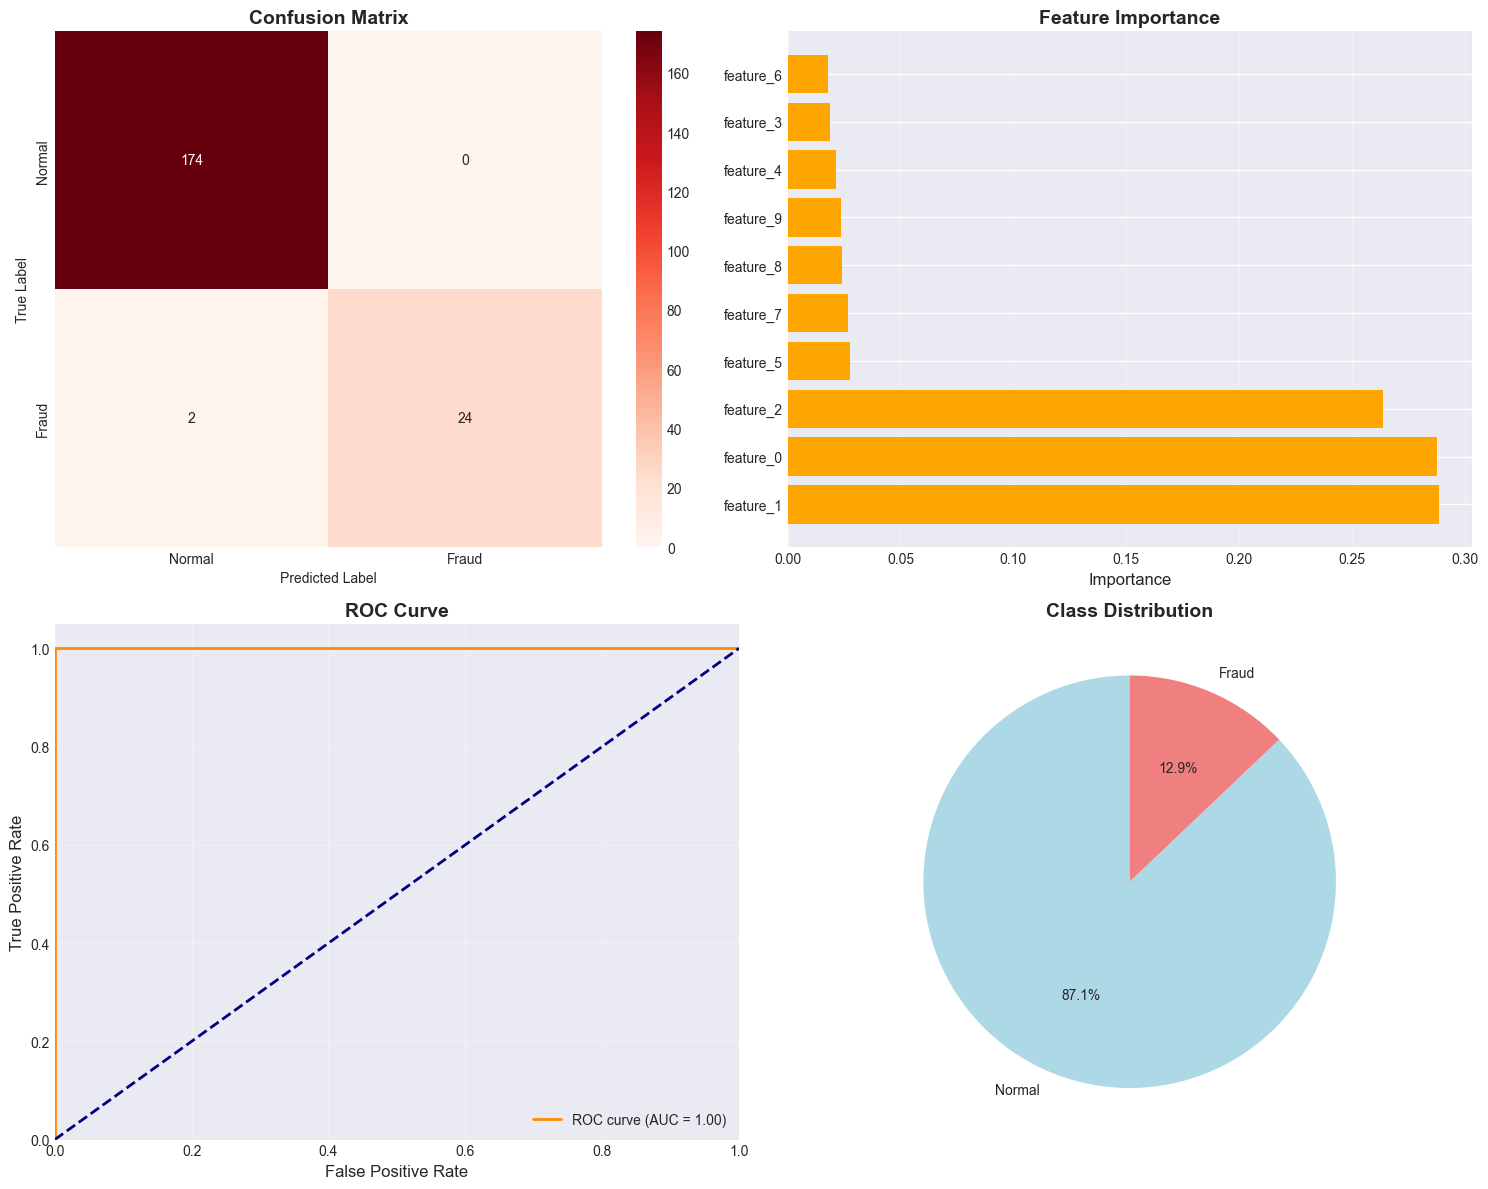

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Confusion Matrix
cm_fraud = confusion_matrix(y_test_fraud, y_pred_fraud)
sns.heatmap(cm_fraud, annot=True, fmt='d', cmap='Reds', ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Predicted Label')
axes[0, 0].set_ylabel('True Label')
axes[0, 0].set_xticklabels(['Normal', 'Fraud'])
axes[0, 0].set_yticklabels(['Normal', 'Fraud'])

# Feature Importance
axes[0, 1].barh(feature_importance_fraud['feature'], feature_importance_fraud['importance'], color='orange')
axes[0, 1].set_xlabel('Importance', fontsize=12)
axes[0, 1].set_title('Feature Importance', fontsize=14, fontweight='bold')
axes[0, 1].grid(alpha=0.3, axis='x')

# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test_fraud, y_pred_fraud_proba)
roc_auc = auc(fpr, tpr)
axes[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axes[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1, 0].set_xlim([0.0, 1.0])
axes[1, 0].set_ylim([0.0, 1.05])
axes[1, 0].set_xlabel('False Positive Rate', fontsize=12)
axes[1, 0].set_ylabel('True Positive Rate', fontsize=12)
axes[1, 0].set_title('ROC Curve', fontsize=14, fontweight='bold')
axes[1, 0].legend(loc="lower right")
axes[1, 0].grid(alpha=0.3)

# Class Distribution
class_dist = pd.Series(y_fraud).value_counts()
axes[1, 1].pie(class_dist.values, labels=['Normal', 'Fraud'], autopct='%1.1f%%', 
               colors=['lightblue', 'lightcoral'], startangle=90)
axes[1, 1].set_title('Class Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

---
## 📈 Step 6: Model Comparison & Summary

Compare all trained models and save results.

📊 MODEL TRAINING SUMMARY


,Type,Metric,Score,Samples
Coursera Regressor,Regression,RMSE,0.152331,891
OCR Classifier,Classification,Accuracy,0.32,500
Fraud Classifier,Classification,Accuracy,0.99,1000


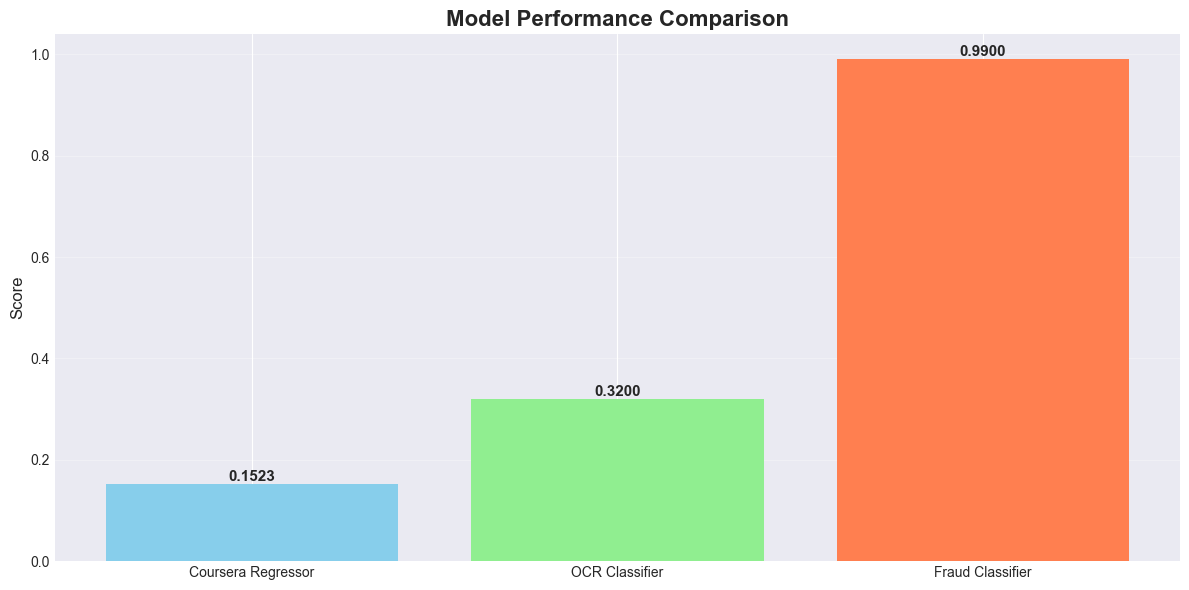


✅ Training Pipeline Complete!


In [14]:
# Compile results
results_summary = {
    'Coursera Regressor': {
        'Type': 'Regression',
        'Metric': 'RMSE',
        'Score': rmse if 'rmse' in locals() else 'N/A',
        'Samples': len(df_coursera) if 'df_coursera' in locals() else 0
    },
    'OCR Classifier': {
        'Type': 'Classification',
        'Metric': 'Accuracy',
        'Score': accuracy_ocr if 'accuracy_ocr' in locals() else 'N/A',
        'Samples': len(ocr_features) if 'ocr_features' in locals() else 0
    },
    'Fraud Classifier': {
        'Type': 'Classification',
        'Metric': 'Accuracy',
        'Score': accuracy_fraud if 'accuracy_fraud' in locals() else 'N/A',
        'Samples': n_samples
    }
}

results_df = pd.DataFrame(results_summary).T
print("="*60)
print("📊 MODEL TRAINING SUMMARY")
print("="*60)
display(results_df)

# Visualize comparison
fig, ax = plt.subplots(figsize=(12, 6))
models = list(results_summary.keys())
scores = [results_summary[m]['Score'] for m in models if results_summary[m]['Score'] != 'N/A']
model_names = [m for m in models if results_summary[m]['Score'] != 'N/A']

bars = ax.bar(range(len(model_names)), scores, color=['skyblue', 'lightgreen', 'coral'])
ax.set_xticks(range(len(model_names)))
ax.set_xticklabels(model_names, rotation=0)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Performance Comparison', fontsize=16, fontweight='bold')
ax.grid(alpha=0.3, axis='y')

# Add value labels on bars
for i, (bar, score) in enumerate(zip(bars, scores)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{score:.4f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Training Pipeline Complete!")

### 💾 Save Trained Models

In [15]:
import joblib

# Create models directory
models_dir = Path('models')
models_dir.mkdir(exist_ok=True)

# Save models
print("💾 Saving models...")

if 'rf_regressor' in locals():
    joblib.dump(rf_regressor, models_dir / 'coursera_regressor.pkl')
    joblib.dump(scaler, models_dir / 'coursera_scaler.pkl')
    print("  ✅ Coursera Regressor saved")

if 'rf_ocr' in locals():
    joblib.dump(rf_ocr, models_dir / 'ocr_classifier.pkl')
    joblib.dump(scaler_ocr, models_dir / 'ocr_scaler.pkl')
    joblib.dump(le, models_dir / 'ocr_label_encoder.pkl')
    print("  ✅ OCR Classifier saved")

if 'rf_fraud' in locals():
    joblib.dump(rf_fraud, models_dir / 'fraud_classifier.pkl')
    joblib.dump(scaler_fraud, models_dir / 'fraud_scaler.pkl')
    print("  ✅ Fraud Classifier saved")

# Save results summary
results_summary_detailed = {
    'coursera_regressor': {
        'rmse': float(rmse) if 'rmse' in locals() else None,
        'mae': float(mae) if 'mae' in locals() else None,
        'r2': float(r2) if 'r2' in locals() else None
    },
    'ocr_classifier': {
        'accuracy': float(accuracy_ocr) if 'accuracy_ocr' in locals() else None,
        'samples': len(ocr_features) if 'ocr_features' in locals() else 0
    },
    'fraud_classifier': {
        'accuracy': float(accuracy_fraud) if 'accuracy_fraud' in locals() else None,
        'precision': float(precision_fraud) if 'precision_fraud' in locals() else None,
        'recall': float(recall_fraud) if 'recall_fraud' in locals() else None,
        'f1_score': float(f1_fraud) if 'f1_fraud' in locals() else None
    }
}

with open(models_dir / 'training_results.json', 'w') as f:
    json.dump(results_summary_detailed, f, indent=2)

print("\n✅ All models and results saved to 'models/' directory!")
print(f"\nSaved files:")
for file in sorted(models_dir.glob('*')):
    print(f"  - {file.name}")

💾 Saving models...
  ✅ Coursera Regressor saved
  ✅ OCR Classifier saved
  ✅ Fraud Classifier saved



✅ All models and results saved to 'models/' directory!

Saved files:
  - classifier.pkl
  - coursera_regressor.pkl
  - coursera_scaler.pkl
  - fraud_classifier.pkl
  - fraud_scaler.pkl
  - ocr_classifier.pkl
  - ocr_label_encoder.pkl
  - ocr_scaler.pkl
  - random_forest_classifier.pkl
  - random_forest_scaler.pkl
  - regressor.pkl
  - results.json
  - training_results.json
